# Predictive Models for HR

**Project Objectives:**

By leveraging HR analysis, businesses can enhance employee productivity and proactively manage staff turnover. This project focuses on supporting a team of HR analysts to streamline their processes for greater efficiency.

In alignment with the customer’s business objectives, the project will involve the creation of two predictive models:

1. The first model will predict employee satisfaction levels based on customer data.
2. The second model will anticipate when an employee might decide to leave the company.

**Data Source:**

The entire dataset contains information about the company's employees, presented in five files.

For the **first model**, the target attribute is the **level of employee satisfaction** with work in the company. This information is derived from feedback forms, where employees complete a test questionnaire. Their satisfaction percentage is then calculated on a scale from 0 to 1, where 0 represents complete dissatisfaction, and 1 signifies complete satisfaction.

For the **second model**, the target attribute is the **employee's departure** from the company.

**Tools and libraries:**
- Python
- Pandas
- Matplotlib
- Numpy
- Sklearn
- Seaborn
- Phik

# Прогнозная модель в управлении персоналом

**Аннотация проекта** 

На данных компании проводится исследовательский анализ с последующей разработкой решения на основе моделирования, которое позволит бизнесу оптимизировать управление персоналом.

**Цель исследования** — разработать две прогнозные модели, которые помогут бизнесу оптимизировать управление персоналом. Для этого будут выполнены следующие шаги:

- Предварительная обработка данных.
- Исследовательский анализ.
- Подготовка данных для машинного обучения.
- Выбор модели и алгоритма её обучения.
- Обучение, настройка, тестирование и проверка качества моделей. 
- Прогноз и выводы.
- Общий вывод и предложения. 

Учитывая бизнес-задачи заказчика, предстоит создать две прогнозные модели:

1. Первая будет предсказывать уровень удовлетворённости сотрудников на основе данных заказчика.
2. Вторая — рассчитывать вероятность оттока сотрудников.

**Описание данных**

Весь набор данных содержит информацию о сотрудниках компании. При этом, данные представлены в пяти файлах. Целевой признак **для первой модели** — `уровень удовлетворённости сотрудника работой в компании`. Эта информация получена из форм обратной связи, где сотрудники заполняют тест-опросник, и по его результатам рассчитывается доля их удовлетворённости от 0 до 1, где 0 — совершенно неудовлетворён, 1 — полностью удовлетворён. Целевой признак **для второй модели** — `увольнение сотрудника из компании`. Датасет с входными признаками тестовой выборки един для первой и второй модели. Тренировочная выборка различна для каждой из двух моделей.

**Инструменты и библиотеки:**
- Python
- Pandas
- Matplotlib
- Numpy
- Sklearn
- Seaborn
- Phik

In [1]:
! pip install phik -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
! pip install --upgrade scikit-learn -q


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# импорт библиотек, модулей и функций
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings

# функция для расчёта матрицы корреляции
from phik import phik_matrix

# функция для разделения датасета на выборки
from sklearn.model_selection import train_test_split

# инструменты для пайплайн
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# классы для преобразования данных
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    LabelEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    FunctionTransformer
)

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# классы для моделей машинного обучения
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# инструменты для автоподбора гиперпараметров
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# инструменты для создания и расчёта метрик
from sklearn.metrics import make_scorer
from sklearn.metrics import (
    roc_auc_score, 
    confusion_matrix, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)

In [4]:
# установим настройки для отображения всех столбцов датафрейма
pd.set_option('display.max_columns', None)

### Шаг 1. Загрузка данных

1. Загрузим файлы и проверим, что данные в таблицах соответствуют описанию.
2. Данные представлены в пяти файлах. Определим функции, чтобы нивелировать повторяющиеся действия при выводе основной информации и проверке данных на дубликаты и пустые значения.

In [5]:
# определим функцию data_info() для вывода основной информации
def data_info(data):
    data.info()
    display(data.head())

In [6]:
# определим функцию data_isnull_isdup() для проверки на дубликаты и пустые значения
def data_isnull_isdup(data):
    print('Количество явных дубликатов:', data.duplicated().sum())
    print('Количество пропусков:')
    print(data.isnull().sum())

In [7]:
# считываем данные из csv-файлов и сохраняем в соответствующие датафреймы
# укажем в аргументах разделители столбцов
df_train = pd.read_csv('https://code.s3.yandex.net/datasets/train_job_satisfaction_rate.csv')
df_test = pd.read_csv('https://code.s3.yandex.net/datasets/test_features.csv')
df_target = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_job_satisfaction_rate.csv')
df_train_quit = pd.read_csv('https://code.s3.yandex.net/datasets/train_quit.csv')
df_target_quit = pd.read_csv('https://code.s3.yandex.net/datasets/test_target_quit.csv')

**1. Данные тренировочной выборки (модель 1)**

In [8]:
# вызовем функцию data_info()
data_info(df_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4000 non-null   int64  
 1   dept                   3994 non-null   object 
 2   level                  3996 non-null   object 
 3   workload               4000 non-null   object 
 4   employment_years       4000 non-null   int64  
 5   last_year_promo        4000 non-null   object 
 6   last_year_violations   4000 non-null   object 
 7   supervisor_evaluation  4000 non-null   int64  
 8   salary                 4000 non-null   int64  
 9   job_satisfaction_rate  4000 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
0,155278,sales,junior,medium,2,no,no,1,24000,0.58
1,653870,hr,junior,high,2,no,no,5,38400,0.76
2,184592,sales,junior,low,1,no,no,2,12000,0.11
3,171431,technology,junior,low,4,no,no,2,18000,0.37
4,693419,hr,junior,medium,1,no,no,3,22800,0.20


- В таблице 10 столбцов, из них 5 имеют числовой тип данных и 5 — строковый.
- Столбец `job_satisfaction_rate` — целевой признак, содержит количественные значения и представляет уровень удовлетворённости сотрудника работой в компании.
- Названия колонок соответствуют единому стилю.
- Количество значений в столбцах различается. Значит есть пропуски.

**2. Данные с входными признаками тестовой выборки**

In [9]:
# вызовем функцию data_info()
data_info(df_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     2000 non-null   int64 
 1   dept                   1998 non-null   object
 2   level                  1999 non-null   object
 3   workload               2000 non-null   object
 4   employment_years       2000 non-null   int64 
 5   last_year_promo        2000 non-null   object
 6   last_year_violations   2000 non-null   object
 7   supervisor_evaluation  2000 non-null   int64 
 8   salary                 2000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 140.8+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
0,485046,marketing,junior,medium,2,no,no,5,28800
1,686555,hr,junior,medium,1,no,no,4,30000
2,467458,sales,middle,low,5,no,no,4,19200
3,418655,sales,middle,low,6,no,no,4,19200
4,789145,hr,middle,medium,5,no,no,5,40800


- В таблице 9 столбцов, за вычетом целевого признака, из них 4 имеют числовой тип данных и 5 — строковый.
- Названия колонок соответствуют единому стилю.
- Количество значений в столбцах различается. Значит есть пропуски.

**3. Данные с целевым признаком тестовой выборки (модель 1)**

In [10]:
# вызовем функцию data_info()
data_info(df_target)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     2000 non-null   int64  
 1   job_satisfaction_rate  2000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 31.4 KB


,id,job_satisfaction_rate
0,130604,0.74
1,825977,0.75
2,418490,0.60
3,555320,0.72
4,826430,0.08


- В таблице два чстолбца: `id` и `job_satisfaction_rate` — с числовым типом данных.
- Названия колонок в едином стиле.
- Количество значений в столбцах не различается.

**4. Данные тренировочной выборки (модель 2)**

In [11]:
# вызовем функцию data_info()
data_info(df_train_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,quit
0,723290,sales,middle,high,2,no,no,4,54000,no
1,814010,sales,junior,medium,2,no,no,4,27600,no
2,155091,purchasing,middle,medium,5,no,no,1,37200,no
3,257132,sales,junior,medium,2,no,yes,3,24000,yes
4,910140,marketing,junior,medium,2,no,no,5,25200,no


- В таблице 10 столбцов, из них 4 имеют числовой тип данных и 6 строковый. 
- Столбец `quit` — целевой признак, содержит категориальные значения и представляет факт увольнения сотрудника из компании.
- Названия колонок соответствуют единому стилю.
- Количество значений в столбцах не различается.

**5. Данные с целевым признаком тестовой выборки (модель 2)**

In [12]:
# вызовем функцию data_info()
data_info(df_target_quit)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2000 non-null   int64 
 1   quit    2000 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


,id,quit
0,999029,yes
1,372846,no
2,726767,no
3,490105,no
4,416898,yes


- В таблице два столбца: `id` и `quit` — столбец с категориальными значениями целевого признака.
- Названия колонок в едином стиле.
- Количество значений в столбцах не различается.

**Вывод:** 

Основываясь на предварительном обзоре датафреймов отметим следующее:
- Объёма данных достаточно для дальнейшего исследования.
- Названия столбцов соответствуют единому стилю.
- Количество значений в столбцах таблиц с признаками тренировочной выборки (модель 1) и с входными признаками тестовой выборки различается. Очевидно, в данных есть пропущенные значения, которые следует оценить на следующем шаге предобработки. 

###  Шаг 2. Предобработка данных

1. Проверим данные на наличие пропусков и дубликатов. 
2. Рассмотрим корректность типов данных у каждого признака. При необходимости устраним проблемы.

**1. Данные тренировочной выборки (модель 1)**

In [13]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_train)

Количество явных дубликатов: 0
Количество пропусков:
id                       0
dept                     6
level                    4
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
job_satisfaction_rate    0
dtype: int64


In [14]:
# вывод строк с пропущенными значениями
mask_train = df_train['dept'].isna() | df_train['level'].isna()
nan_rows_train = df_train[mask_train]
nan_rows_train

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary,job_satisfaction_rate
1209,631073,sales,NaN,medium,1,no,no,4,27600,0.66
1469,416327,sales,NaN,low,1,no,no,5,18000,0.73
1526,694746,NaN,junior,medium,5,no,no,4,21600,0.62
1630,814624,NaN,junior,medium,3,no,no,4,24000,0.88
1633,475114,NaN,junior,high,4,no,no,4,31200,0.63
1745,135043,sales,NaN,medium,1,no,no,3,26400,0.30
2522,998838,sales,NaN,medium,1,no,no,5,27600,0.71
2781,497243,NaN,junior,medium,1,no,no,3,26400,0.28
2975,168668,NaN,junior,low,3,no,no,4,18000,0.88
3866,641150,NaN,junior,low,3,no,yes,4,12000,0.54


In [15]:
# просмотр уникальных названий отделов сотрудников
df_train['dept'].sort_values().unique()

array(['hr', 'marketing', 'purchasing', 'sales', 'technology', nan],
      dtype=object)

In [16]:
# просмотр уникальных названий уровней должностей
df_train['level'].sort_values().unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [17]:
# просмотр уникальных названий уровней загруженности
df_train['workload'].sort_values().unique()

array(['high', 'low', 'medium'], dtype=object)

In [18]:
# вывод описательных статистик
df_train.describe()

,id,employment_years,supervisor_evaluation,salary,job_satisfaction_rate
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,544957.621000,3.718500,3.476500,33926.700000,0.533995
std,257883.104622,2.542513,1.008812,14900.703838,0.225327
min,100954.000000,1.000000,1.000000,12000.000000,0.030000
25%,322836.750000,2.000000,3.000000,22800.000000,0.360000
50%,534082.500000,3.000000,4.000000,30000.000000,0.560000
75%,771446.000000,6.000000,4.000000,43200.000000,0.710000
max,999521.000000,10.000000,5.000000,98400.000000,1.000000


- Явных и неявных дубликатов не обнаружено.
- В двух столбцах со строковыми данными — `dept` (отдел, в котором работает сотрудник) и `level` (уровень занимаемой должности) есть пропущенные значения типа NaN. Учтём это при подготовке данных и заполним их в пайплайне. Так как мы работаем с категориальными данными, то оптимальным будет представить пропущенные значения пустой строкой (' ').
- Описание признаков выглядит корректно и пока не вызывает подозрений.

**2. Данные с входными признаками тестовой выборки**

In [19]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_test)

Количество явных дубликатов: 0
Количество пропусков:
id                       0
dept                     2
level                    1
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
dtype: int64


In [20]:
# вывод строк с пропущенными значениями
mask_test = df_test['dept'].isna() | df_test['level'].isna()
nan_rows_test = df_test[mask_test]
nan_rows_test

,id,dept,level,workload,employment_years,last_year_promo,last_year_violations,supervisor_evaluation,salary
191,609865,NaN,junior,medium,1,no,no,1,20400
312,471990,sales,NaN,low,1,no,no,3,12000
1196,832342,NaN,junior,medium,1,no,no,4,28800


In [21]:
# просмотр уникальных названий отделов сотрудников
df_test['dept'].sort_values().unique()

array([' ', 'hr', 'marketing', 'purchasing', 'sales', 'technology', nan],
      dtype=object)

In [22]:
# просмотр уникальных названий уровней должностей
df_test['level'].sort_values().unique()

array(['junior', 'middle', 'sinior', nan], dtype=object)

In [23]:
# просмотр уникальных названий уровней загруженности
df_test['workload'].sort_values().unique()

array([' ', 'high', 'low', 'medium'], dtype=object)

In [24]:
# вывод описательных статистик
df_test.describe()

,id,employment_years,supervisor_evaluation,salary
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,552765.213500,3.666500,3.526500,34066.800000
std,253851.326129,2.537222,0.996892,15398.436729
min,100298.000000,1.000000,1.000000,12000.000000
25%,339052.000000,1.000000,3.000000,22800.000000
50%,550793.000000,3.000000,4.000000,30000.000000
75%,765763.750000,6.000000,4.000000,43200.000000
max,999029.000000,10.000000,5.000000,96000.000000


- В датафрейме не обнаружено явных и неявных дубликатов.
- В двух столбцах со строковыми данными — `dept` и `level` наблюдаются пропущенные значения двух типов: NaN и пустой строки (' '). Заполним их при подготовке данных в пайплайне.
- Количественные значения корректно отображаются в описательных статистиках датафрейма.

**3. Данные с целевым признаком тестовой выборки (модель 1)**

In [25]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_target)

Количество явных дубликатов: 0
Количество пропусков:
id                       0
job_satisfaction_rate    0
dtype: int64


In [26]:
# вывод описательных статистик
df_target.describe()

,id,job_satisfaction_rate
count,2000.000000,2000.00000
mean,552765.213500,0.54878
std,253851.326129,0.22011
min,100298.000000,0.03000
25%,339052.000000,0.38000
50%,550793.000000,0.58000
75%,765763.750000,0.72000
max,999029.000000,1.00000


- Дубликатов и пропусков не обнаружено.
- Значения выглядят корректно.

**4. Данные тренировочной выборки (модель 2)**

In [27]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_train_quit)

Количество явных дубликатов: 0
Количество пропусков:
id                       0
dept                     0
level                    0
workload                 0
employment_years         0
last_year_promo          0
last_year_violations     0
supervisor_evaluation    0
salary                   0
quit                     0
dtype: int64


In [28]:
# просмотр уникальных названий отделов сотрудников
df_train_quit['dept'].sort_values().unique()

array(['hr', 'marketing', 'purchasing', 'sales', 'technology'],
      dtype=object)

In [29]:
# просмотр уникальных названий уровней должностей
df_train_quit['level'].sort_values().unique()

array(['junior', 'middle', 'sinior'], dtype=object)

In [30]:
# просмотр уникальных названий уровней загруженности
df_train_quit['workload'].sort_values().unique()

array(['high', 'low', 'medium'], dtype=object)

In [31]:
# вывод описательных статистик
df_train_quit.describe()

,id,employment_years,supervisor_evaluation,salary
count,4000.000000,4000.000000,4000.000000,4000.000000
mean,552099.283750,3.701500,3.474750,33805.800000
std,260158.031387,2.541852,1.004049,15152.415163
min,100222.000000,1.000000,1.000000,12000.000000
25%,327785.750000,2.000000,3.000000,22800.000000
50%,546673.000000,3.000000,4.000000,30000.000000
75%,781497.750000,6.000000,4.000000,43200.000000
max,999915.000000,10.000000,5.000000,96000.000000


- Пропусков и дубликатов не обнаружено.
- Числовые значения корректно отображаются в описательных статистиках датафрейма.

**5. Данные с целевым признаком тестовой выборки (модель 2)**

In [32]:
# вызовем функцию data_isnull_isdup() и оценим есть ли пропуски и дубликаты 
data_isnull_isdup(df_target_quit)

Количество явных дубликатов: 0
Количество пропусков:
id      0
quit    0
dtype: int64


- Дубликатов и пропусков не обнаружено.
- Таблица содержит категориальные значения целевого признака `quit` — увольнение сотрудника из компании.

**Вывод:**

На подготовительном этапе мы изучили основные сведения о пяти датафреймах с последующей предобработкой:
- определили количество и тип данных в таблицах
- проверили данные на наличие пропусков и дубликатов
- убедились, что все данные отображаются корректно

В таком виде данные готовы к более подробному исследовательскому анализу.

### Шаг 3. Исследовательский анализ данных

1. Проведём исследовательский анализ всех признаков. 
2. Оценим их особенности для выбора корректных способов подготовки к обучению модели.

**1. Проведём анализ категориальных признаков таблицы с данными тренировочной выборки (модель 1)**

In [33]:
# выведем число уникальных значений в каждом из категориальных столбцов
cat_col_df_train = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
df_train[cat_col_df_train].nunique()

dept                    5
level                   3
workload                3
last_year_promo         2
last_year_violations    2
dtype: int64

В таблице пять категориальных признаков, которые содержат от двух до пяти категорий.

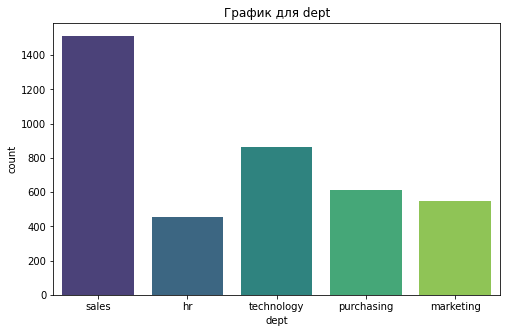

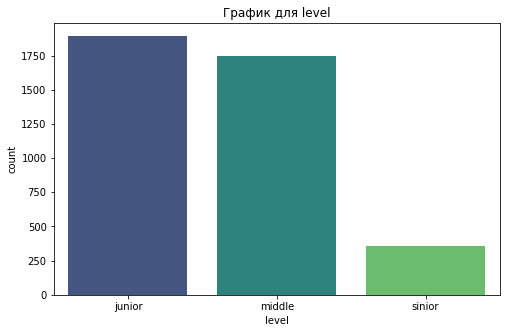

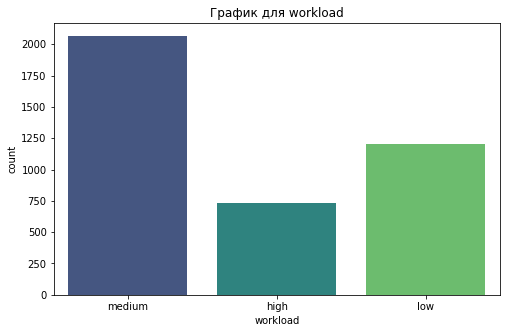

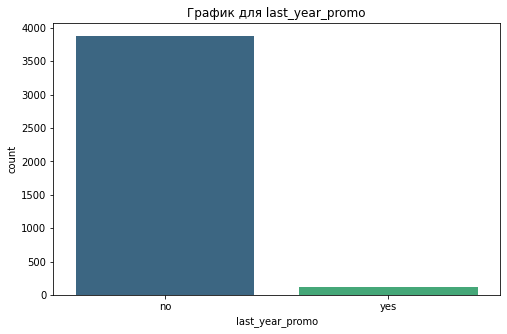

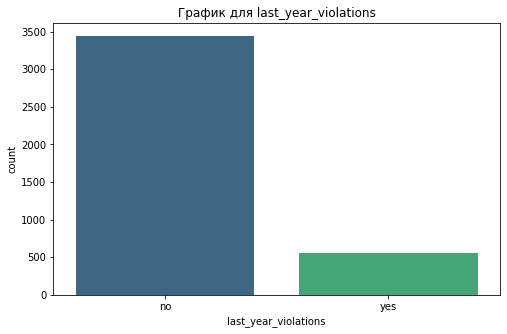

In [34]:
# визуализируем значения признаков
for column in cat_col_df_train:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df_train, palette='viridis')
    plt.title(f'График для {column}')
    plt.show()

**Данные с характеристиками сотрудников компании представлены следующими особенностями:**
- Большинство сотрудников работает в отделе продаж. Наименьшая часть занята в отделе управления персоналом.
- Почти в равном соотношении сотрудники распределены по уровню занимаемой должности в классах `junior` и `middle`. Наименьшую часть представляют `sinior`.
- Уровень загруженности сотрудников в основном средний.
- Повышение за последний год — очень редкое явление в компании.
- Сотрудников нарушивших трудовой договор за последний год тоже довольно мало.

**Рассмотрим количественные признаки по этому же датасету**

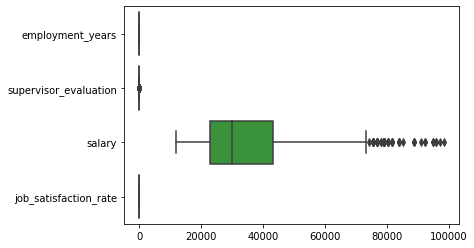

In [35]:
# список количественных признаков таблицы
num_col_df_train = [
    'employment_years',
    'supervisor_evaluation',
    'salary',
    'job_satisfaction_rate'
]

# построим диаграмму ящик с усами
sns.boxplot(data=df_train[num_col_df_train], orient='h')
plt.yticks(range(len(num_col_df_train)), num_col_df_train)
plt.show()

1. В целом диаграмма показывает, что почти все признаки разного масштаба:
- `длительность работы в компании` измеряется в годах
- `качество работы сотрудника` измеряется оценкой от 1 до 5
- `ежемесячная зарплата сотрудника` представлена в денежном эквиваленте
- `уровень удовлетворённости сотрудника работой в компании` измеряется оценкой от 0 до 1
2. Есть выбросы. Это могут быть случаи с необычно высокими значениями по сравнению с остальной частью набора данных. От выбросов следовало бы избавиться для корректного обучения модели, однако пока оставим их как есть.
3. Все эти особенности будем учитывать при подготовке данных для обучения модели.

Построим гистограмму частотности распределения для каждого признака, чтобы получить наглядное представление о структуре данных.

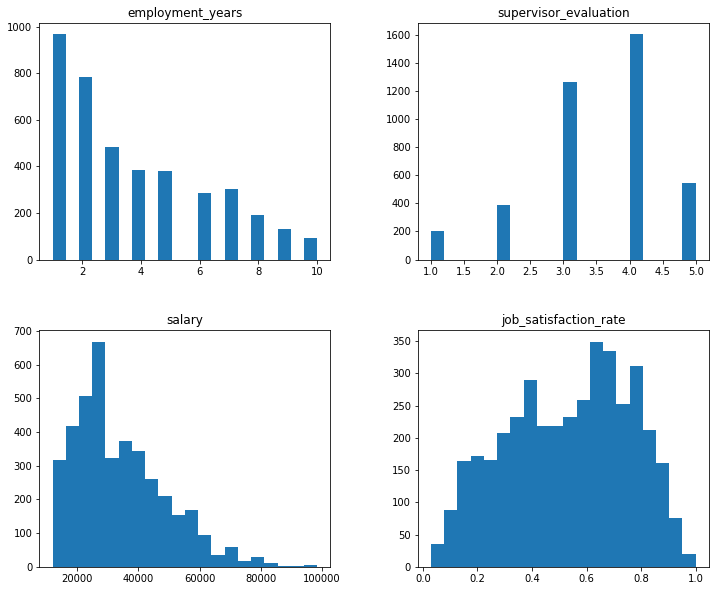

In [36]:
# построим гистограммы
df_train[num_col_df_train].hist(bins=20, figsize=(12, 10), grid=False)
plt.show()

**Вывод:**
- Максимальная `длительность работы в компании` составляет 10 лет, при этом большинство сотрудников работают в компании 1 - 2 года.
- Наиболее частая оценка `качества работы сотрудника` руководителем — 4 из максимальных 5 баллов.
- Распределение `ежемесячной зарплаты сотрудников` смещено вправо, при этом большинство зарабатывают от 20 до 30 тысяч, но с длинным правым хвостом наблюдений, которые зарабатывают гораздо больше.
- Средняя оценка `уровня удовлетворённости сотрудника работой в компании` составляет 0.56 из максимального 1 балла.

**2. Проведём анализ категориальных данных с входными признаками тестовой выборки**

In [37]:
# выведем число уникальных значений в каждом из категориальных столбцов
cat_col_df_test = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations']
df_test[cat_col_df_test].nunique()

dept                    6
level                   3
workload                4
last_year_promo         2
last_year_violations    2
dtype: int64

В таблице пять категориальных признаков, которые содержат от двух до шести категорий.

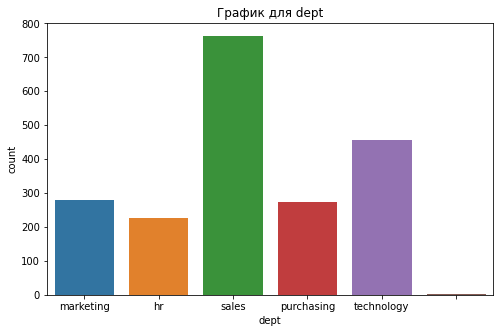

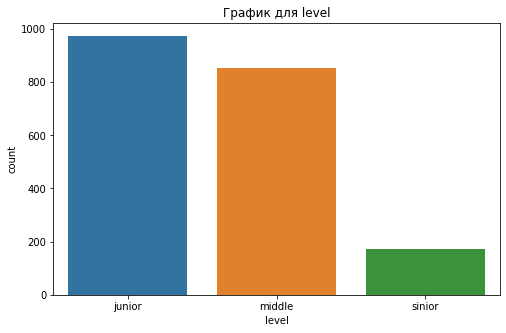

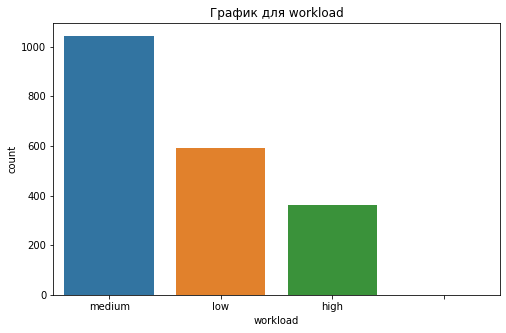

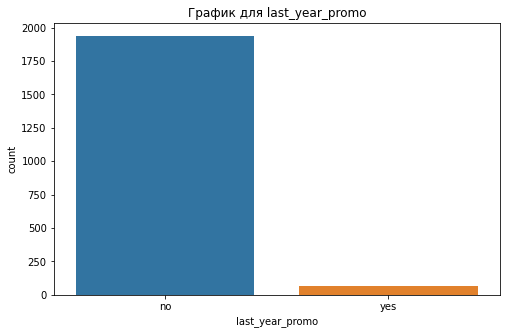

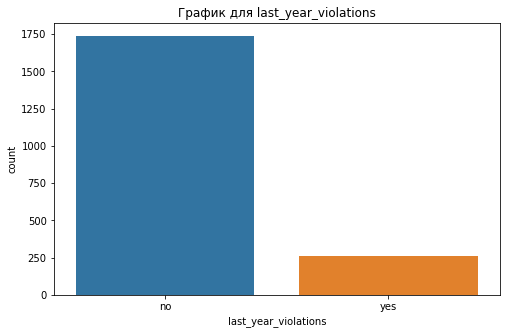

In [38]:
# визуализируем значения признаков
for column in cat_col_df_test:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df_test)
    plt.title(f'График для {column}')
    plt.show()

- В целом данные представлены похожим с тренировочным датасетом образом.
- Есть пропущенные значения типа пустой строки (' ') в столбцах `dept` и `workload`.

**Рассмотрим количественные признаки по этому же датасету**

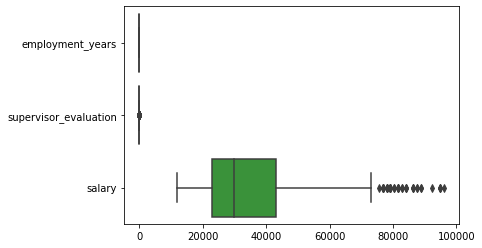

In [39]:
# список количественных признаков таблицы
num_col_df_test = [
    'employment_years',
    'supervisor_evaluation',
    'salary'
]

# построим диаграмму ящик с усами
sns.boxplot(data=df_test[num_col_df_test], orient='h')
plt.yticks(range(len(num_col_df_test)), num_col_df_test)
plt.show()

- Данные характеризуются такими же особенностями как наблюдались в датасете с тренировочной выборкой — почти все признаки разного масштаба.
- Есть выбросы.
- Выявленные особенности будем учитывать при подготовке данных для тестирования модели.

Построим гистограмму частотности распределения для каждого признака, чтобы получить наглядное представление о структуре данных.

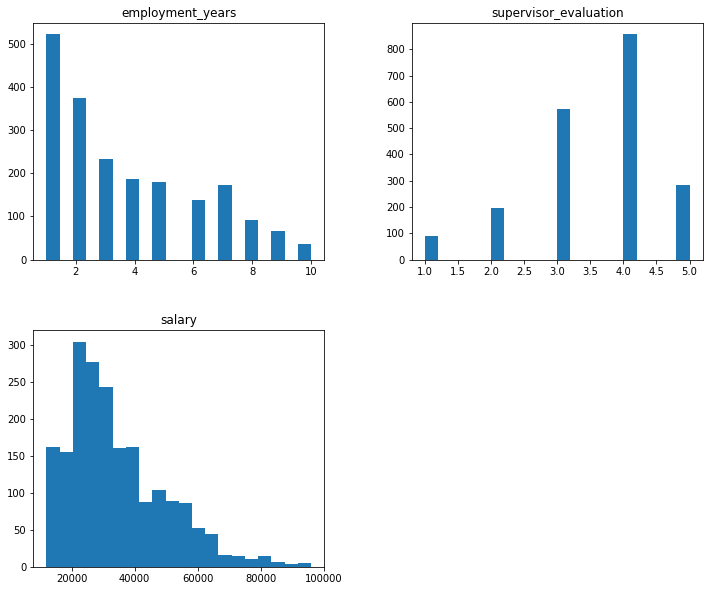

In [40]:
# построим гистограммы
df_test[num_col_df_test].hist(bins=20, figsize=(12, 10), grid=False)
plt.show()

**Вывод:**
- Максимальная `длительность работы в компании` составляет 10 лет, при этом большинство сотрудников работают в компании 1 - 2 года.
- Наиболее частая оценка `качества работы сотрудника` руководителем — 4 из максимальных 5 баллов.
- Распределение `ежемесячной зарплаты сотрудников` имеет положительную асимметрию: большинство сотрудников зарабатывают в среднем от 20 до 30 тысяч, при этом есть и те, кто получают гораздо более высокие зарплаты.

**3. Рассмотрим данные с целевым признаком тестовой выборки (модель 1)**

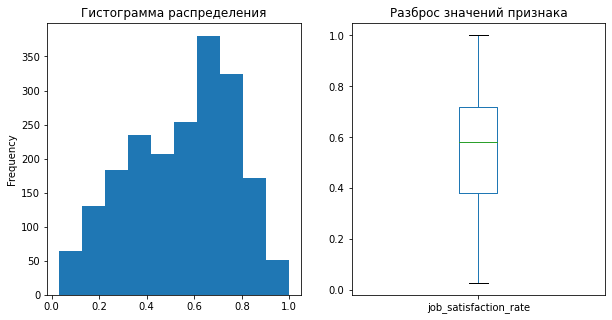

In [41]:
# рассмотрим значения по целевому признаку тестовой выборки первой модели
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
df_target['job_satisfaction_rate'].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
df_target['job_satisfaction_rate'].plot(kind='box', ax=axes[1])
axes[1].set_title('Разброс значений признака')
plt.show()

**Вывод:**

- Согласно графикам большинство сотрудников оценивают `удовлетворённость работой в компании` в среднем на 0.58 баллов.
- Диапазон оценок варьируется в пределах от 0.03 до 1 балла.
- Выбросов не обнаружено.

**4. Проанализируем категориальные данные тренировочной выборки (модель 2)**

In [42]:
# выведем число уникальных значений в каждом из категориальных столбцов
cat_col_df_train_quit = ['dept', 'level', 'workload', 'last_year_promo', 'last_year_violations', 'quit']
df_train_quit[cat_col_df_train_quit].nunique()

dept                    5
level                   3
workload                3
last_year_promo         2
last_year_violations    2
quit                    2
dtype: int64

В таблице шесть категориальных признаков, включая целевой `quit` — увольнение сотрудника из компании.

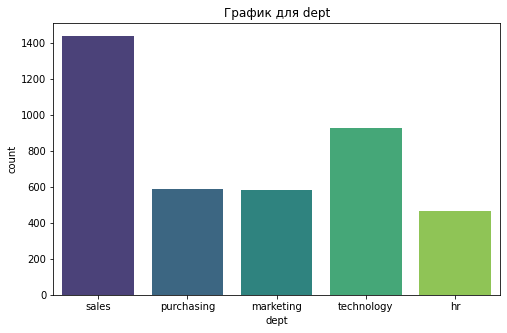

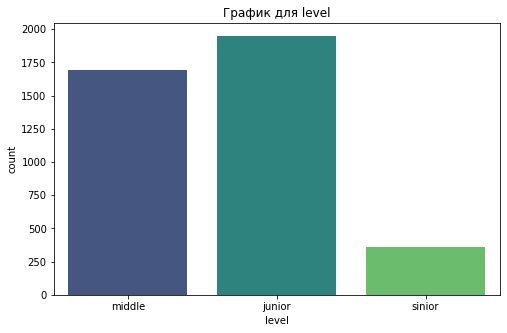

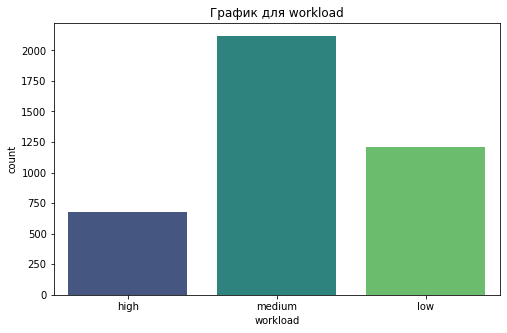

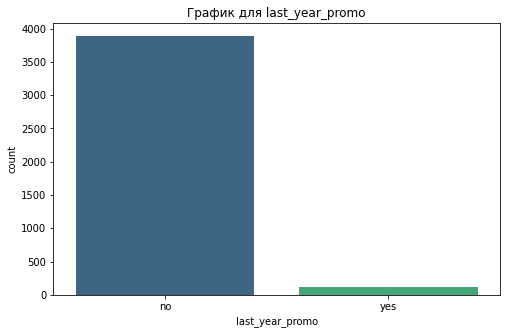

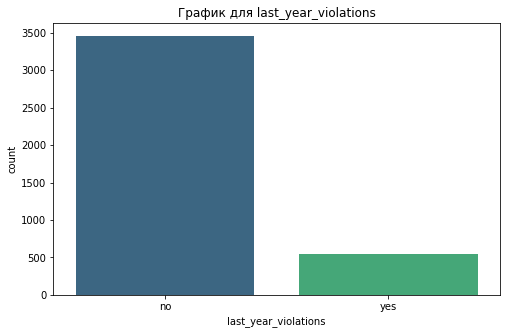

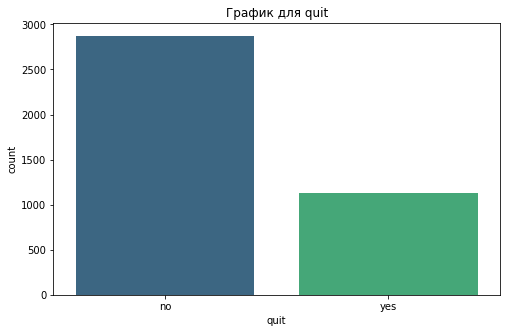

In [43]:
# визуализируем значения признаков
for column in cat_col_df_train_quit:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df_train_quit, palette='viridis')
    plt.title(f'График для {column}')
    plt.show()

**Данные с характеристиками сотрудников компании представлены следующими особенностями:**
- Большинство сотрудников работает в отделе продаж. Наименьшая часть занята в отделе управления персоналом.
- Почти в равном соотношении сотрудники распределены по уровню занимаемой должности в классах `junior` и `middle`. Наименьшую часть представляют `sinior`.
- Уровень загруженности сотрудников в основном средний.
- Повышение за последний год — очень редкое явление в компании.
- Более трети сотрудников были `уволены` из компании.

In [44]:
# оценим распределение категорий по столбцу целевого признака
df_train_quit['quit'].value_counts(normalize=True)

no     0.718
yes    0.282
Name: quit, dtype: float64

- Столбец содержит значения целевого признака, который представлен бинарной категорией — `увольнение сотрудника из компании` «да» или «нет».
- Вместе с тем, целевой категориальный признак несбалансирован. 
- Проблему дисбаланса классов следует учесть при подготовке данных для обучения моделей.

**Рассмотрим количественные признаки по этому же датасету**

In [45]:
df_train_quit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     4000 non-null   int64 
 1   dept                   4000 non-null   object
 2   level                  4000 non-null   object
 3   workload               4000 non-null   object
 4   employment_years       4000 non-null   int64 
 5   last_year_promo        4000 non-null   object
 6   last_year_violations   4000 non-null   object
 7   supervisor_evaluation  4000 non-null   int64 
 8   salary                 4000 non-null   int64 
 9   quit                   4000 non-null   object
dtypes: int64(4), object(6)
memory usage: 312.6+ KB


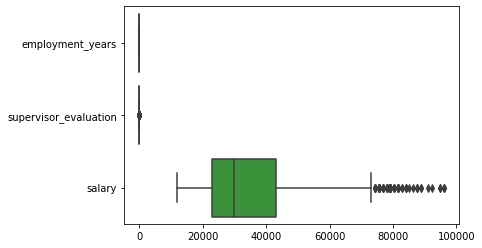

In [46]:
# список количественных признаков таблицы
num_col_df_train_quit = [
    'employment_years',
    'supervisor_evaluation',
    'salary'
]

# построим диаграмму ящик с усами
sns.boxplot(data=df_train_quit[num_col_df_train_quit], orient='h')
plt.yticks(range(len(num_col_df_train_quit)), num_col_df_train_quit)
plt.show()

1. Диаграмма показывает, что почти все признаки разного масштаба:
- `длительность работы в компании` измеряется в годах
- `качество работы сотрудника` измеряется оценкой от 1 до 5
- `ежемесячная зарплата сотрудника` представлена в денежном эквиваленте
2. Есть выбросы. Это могут быть случаи с необычно высокими значениями по сравнению с остальной частью набора данных. От выбросов следовало бы избавиться для корректного обучения модели, однако пока оставим их как есть.
3. Все эти особенности будем учитывать при подготовке данных для обучения модели.

Построим гистограмму частотности распределения для каждого признака, чтобы получить наглядное представление о структуре данных.

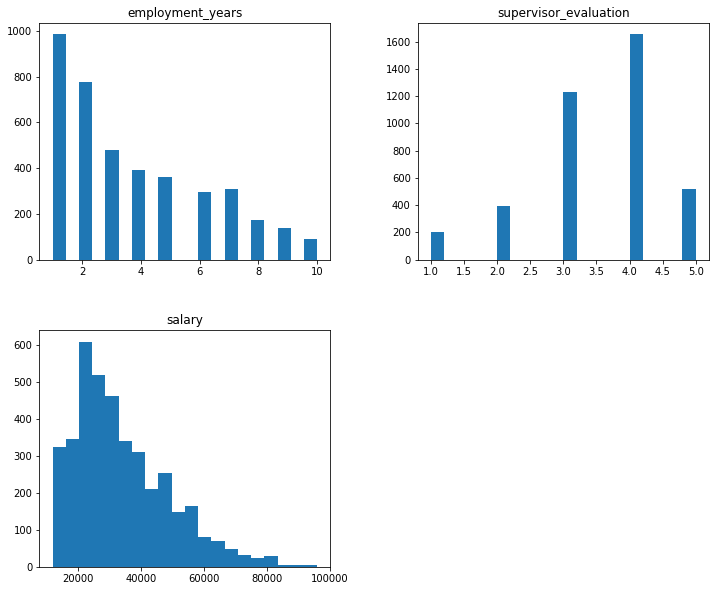

In [47]:
# построим гистограммы
df_train_quit[num_col_df_train_quit].hist(bins=20, figsize=(12, 10), grid=False)
plt.show()

**Вывод:**
- Большинство сотрудников работают в компании 1 - 2 года, при этом максимальная `длительность работы в компании` составляет 10 лет. 
- Наиболее частая оценка `качества работы сотрудника` руководителем — 4 из максимальных 5 баллов.
- Распределение `ежемесячной зарплаты сотрудников` имеет положительную асимметрию: большинство сотрудников зарабатывают в среднем от 20 до 30 тысяч, при этом есть и те, кто получают гораздо более высокие зарплаты.

**5. Рассмотрим данные с целевым признаком тестовой выборки (модель 2)**

In [48]:
# оценим распределение категорий по столбцу целевого признака
df_target_quit['quit'].value_counts(normalize=True)

no     0.718
yes    0.282
Name: quit, dtype: float64

- Столбец содержит значения целевого признака, который представлен бинарной категорией — `увольнение сотрудника из компании` «да» или «нет».
- Целевой категориальный признак несбалансирован. Объектов класса 0 существенно больше чем объектов класса 1.

**Вывод:**

В данных наблюдается существенный разброс значений. Прежде чем использовать признаки для моделей их нужно подготовить:
- Масштабировать количественные признаки.
- Кодировать категориальные признаки.
- Подготовка признаков будет выполняться в пайплайне.

### Шаг 4. Корреляционный анализ данных

Учитывая бизнес-задачи заказчика, предстоит создать две прогнозные модели:
1. Первая будет предсказывать уровень удовлетворённости сотрудников на основе данных заказчика *(задача линейной регрессии)*.
2. Вторая — рассчитывать вероятность оттока сотрудников *(задача для бинарной классификации)*.

На предыдущем этапе было обнаружено, что не все признаки распределены нормально, поэтому для изучения взаимосвязи будем использовать корреляцию Phik, который устойчив к выбросам и ненормальному распределению.

**Корреляционный анализ данных тренировочной выборки (модель 1)**

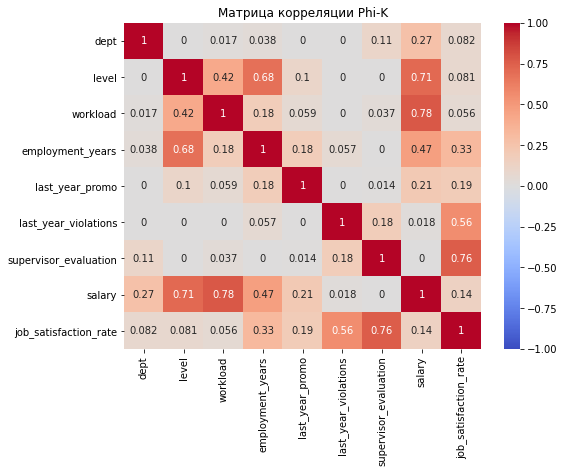

In [49]:
# для расчёта матрицы сохраним признаки в отдельную переменную, исключив id
df_train_phik = df_train[[
    'dept',
    'level',
    'workload',
    'employment_years',
    'last_year_promo',
    'last_year_violations',
    'supervisor_evaluation',
    'salary',
    'job_satisfaction_rate'
]]

# укажем количественные признаки
num_cols = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate']

# рассчитаем матрицу корреляции Phi-K между всеми признаками
phik_matrix = df_train_phik.phik_matrix(interval_cols=num_cols)

# построим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Матрица корреляции Phi-K')
plt.show()

**Вывод:**
- Целевой признак `удовлетворённость сотрудника работой в компании` коррелирует с входным `оценка качества работы сотрудника руководителем`, коэффициент корреляции указывают на довольно сильную положительную связь.
- Менее сильная связь заметна между таргетом и признаком `last_year_violations`.
- Остальные входные признаки имеют слабую связь или почти не коррелируют с таргетом.
- Матрица корреляции показывает, что в датасете не обнаружено пар признаков в количественной шкале, которые сильно коррелируют друг с другом, мультиколлинеарности не наблюдается.

Так как первая модель это задача линейной регрессии, то следует оценить характер связи между целевым и входными признаками. Слабая линейная связь между целевыми и выходными признаками не подходит для линейной регрессии. 

**Оценим взаимосвязь между признаками тренировочного датасета для первой модели.**

**Построим диаграммы рассеяния для таргета `job_satisfaction_rate` и всех количественных признаков с учётом `last_year_promo`.**

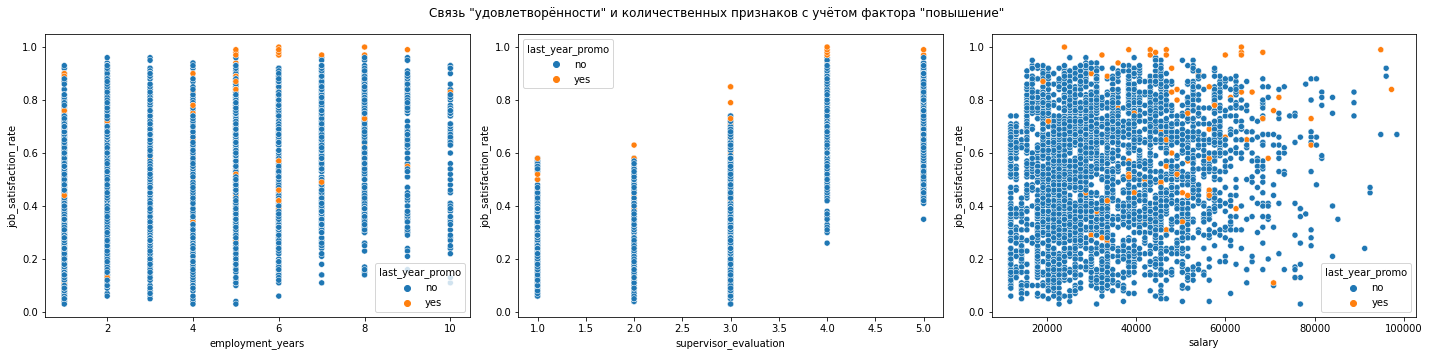

In [50]:
# диаграммы рассеяния для тагрета и всех количественных признаков
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

fig.suptitle('Связь "удовлетворённости" и количественных признаков с учётом фактора "повышение"')

sns.scatterplot(x='employment_years', y='job_satisfaction_rate', hue='last_year_promo', data=df_train, ax=axes[0])
sns.scatterplot(x='supervisor_evaluation', y='job_satisfaction_rate', hue='last_year_promo', data=df_train, ax=axes[1])
sns.scatterplot(x='salary', y='job_satisfaction_rate', hue='last_year_promo', data=df_train, ax=axes[2])

plt.tight_layout()
plt.show()

- Линейной связи очевидно не наблюдается на графиках.
- Однако, не будем отказываться от линейной модели в данной задаче и рассмотрим её в качестве эксперимента в паре с моделью дерева решений.

**Корреляционный анализ данных тренировочной выборки (модель 2)**

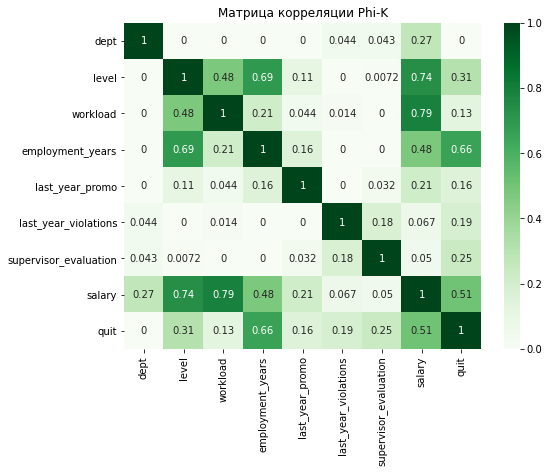

In [51]:
# для расчёта матрицы сохраним признаки в отдельную переменную, исключив id
df_train_quit_phik = df_train_quit[[
    'dept',
    'level',
    'workload',
    'employment_years',
    'last_year_promo',
    'last_year_violations',
    'supervisor_evaluation',
    'salary',
    'quit'
]]

# укажем количественные признаки
num_cols_quit = ['employment_years', 'supervisor_evaluation', 'salary']

# рассчитаем матрицу корреляции Phi-K между всеми признаками
phik_matrix_quit = df_train_quit_phik.phik_matrix(interval_cols=num_cols_quit)

# построим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(phik_matrix_quit, annot=True, cmap='Greens', vmin=0, vmax=1)
plt.title('Матрица корреляции Phi-K')
plt.show()

Мультиколлинеарности, то есть тесной связи между парами количественных признаков, не наблюдается. Значит не должно возникнуть ситуации затрудняющей различение индивидуального воздействия входного признака на тагрет.

### Шаг 5. Подготовка данных и обучение моделей (задача регрессии)

**1. Подготовку признаков выполним в пайплайне.**
Перечислим особенности данных:
- Целевой признак — уровень удовлетворённости сотрудника `job_satisfaction_rate`: прогнозируем непрерывный признак.
- Катагориальные признаки: `dept`, `last_year_promo` и `last_year_violations` — нужно кодировать с помощью `OneHotEncoder`.
- Категориальные признаки: `level` и `workload` — нужно кодировать с помощью `OrdinalEncoder`, так как это категориальный порядковый тип. У такого признака есть логичная связь между категориями, в частности, уровень занимаемой должности и уровень загруженности сотрудника.
- Количественные признаки: `salary`, `employment_years`, `supervisor_evaluation` — нужно масштабировать.
- Масштабируем числовые признаки `RobustScaler`, чтобы сделать модель менее чувствительной к выбросам.
- Метод масштабирования сделаем гиперпараметром, то есть зададим возможность перебора методов `StandardScaler` и `MinMaxScaler`.

**2. Определим функцию для расчета симметричной средней абсолютной процентной ошибки (SMAPE) между прогнозируемыми и фактическими значениями.**

**3. Обучим две модели:**
- DecisionTreeRegressor()
- LinearRegression()

**4. Подберём гиперпараметры.**

**5. Проверим качество модели на основе метрики SMAPE и определим лучшую.**

In [52]:
# проверим соответствие порядка данных в df_test и df_target
check_order = (df_test['id'] == df_target['id']).all()
if check_order:
    print("Порядок данных совпадает")
else:
    print("Порядок данных не совпадает")

Порядок данных не совпадает


- Порядок данных в датафреймах не совпадает. Это может стать причиной некорректной оценки прогнозных способностей модели.
- Упорядочим данные тестовой и целевой выборки по 'id' и проверим результат.

In [53]:
# упорядочим данные тестовой и целевой выборок по id
df_test = df_test.sort_values(by='id')
df_target = df_target.sort_values(by='id')

In [54]:
# определим функцию для расчета SMAPE
def smape(y_true, y_pred):
    error = np.abs(y_true - y_pred)
    avg = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(error / avg) * 100
# создадим метрику на основе SMAPE функции
scorer_smape = make_scorer(smape, greater_is_better=False)

In [55]:
# объявляем константы
RANDOM_STATE = 42

# выделяем в отдельные переменные целевой признак и входные признаки
X_train = df_train.drop(['id'], axis=1)

# так как мы удалили признак id с неповторяющимися значениями, то могут возникнуть дубликаты
# проверим дубликаты в X_train
print('Количество дубликатов в обучающей выборке:', X_train.duplicated().sum())

Количество дубликатов в обучающей выборке: 245


In [56]:
# удаление дубликатов в X_train
X_train = X_train.drop_duplicates()

X_train = X_train.drop(['job_satisfaction_rate'], axis=1)
# приведём в соответствие целевую переменную
y_train = df_train.loc[X_train.index]['job_satisfaction_rate']
X_test = df_test.drop(['id'], axis=1) 
y_test = df_target['job_satisfaction_rate']

In [57]:
# списки с названиями признаков
ohe_columns = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns = ['level', 'workload']
num_columns = ['employment_years', 'supervisor_evaluation', 'salary']

# пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe = Pipeline([
    ('missing_nan_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('missing_space_imputer', SimpleImputer(missing_values=' ', strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

# масштабируем числовые признаки RobustScaler, чтобы сделать модель менее чувствительной к выбросам
num_transformer = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', RobustScaler())
])

# пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'sinior'],
            ['low', 'medium', 'high']
        ],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan
    )),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer([
    ('ohe', ohe_pipe, ohe_columns),
    ('ord', ord_pipe, ord_columns),
    ('num', num_transformer, num_columns)
], remainder='passthrough')

# итоговый пайплайн: подготовка данных и модель
# опускаем предупреждения
warnings.filterwarnings('ignore')

pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeRegressor(random_state=RANDOM_STATE))
])

param_grid = [
    # словарь для модели DecisionTreeRegressor()
    {
        'models': [DecisionTreeRegressor(random_state=RANDOM_STATE)],
        'models__max_depth': [None, 5, 10, 15, 20],
        'models__min_samples_split': [2, 5, 10, 20, 30],
        'models__min_samples_leaf': [1, 5, 10, 15],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LinearRegression()
    {
        'models': [LinearRegression()],
        'models__fit_intercept': [True, False],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final,
    param_distributions=param_grid,
    cv=5,
    scoring=scorer_smape,
    error_score='raise',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# обучаем модель
randomized_search.fit(X_train, y_train)

# выведем результаты оценки 10 лучших моделей
result = pd.DataFrame(randomized_search.cv_results_)
with pd.option_context('max_colwidth', 3000):
    display(result[['rank_test_score', 'param_models', 'mean_test_score','params']]
            .sort_values('rank_test_score').head(10))

,rank_test_score,param_models,mean_test_score,params
3,1,DecisionTreeRegressor(random_state=42),-15.502061,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 10, 'models__min_samples_leaf': 5, 'models__max_depth': 15, 'models': DecisionTreeRegressor(random_state=42)}"
5,2,DecisionTreeRegressor(random_state=42),-15.686190,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 20, 'models__min_samples_leaf': 1, 'models__max_depth': None, 'models': DecisionTreeRegressor(random_state=42)}"
0,3,DecisionTreeRegressor(random_state=42),-16.051705,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 2, 'models__min_samples_leaf': 1, 'models__max_depth': 15, 'models': DecisionTreeRegressor(random_state=42)}"
9,4,DecisionTreeRegressor(random_state=42),-16.064842,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 10, 'models__max_depth': None, 'models': DecisionTreeRegressor(random_state=42)}"
1,5,DecisionTreeRegressor(random_state=42),-16.520855,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 10, 'models__max_depth': 10, 'models': DecisionTreeRegressor(random_state=42)}"
7,5,DecisionTreeRegressor(random_state=42),-16.520855,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 10, 'models__min_samples_leaf': 10, 'models__max_depth': 10, 'models': DecisionTreeRegressor(random_state=42)}"
8,7,DecisionTreeRegressor(random_state=42),-16.976656,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 2, 'models__min_samples_leaf': 15, 'models__max_depth': 10, 'models': DecisionTreeRegressor(random_state=42)}"
2,8,DecisionTreeRegressor(random_state=42),-20.196409,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 10, 'models__min_samples_leaf': 15, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"
6,8,DecisionTreeRegressor(random_state=42),-20.196409,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 30, 'models__min_samples_leaf': 15, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"
4,10,DecisionTreeRegressor(random_state=42),-20.206874,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 2, 'models__min_samples_leaf': 1, 'models__max_depth': 5, 'models': DecisionTreeRegressor(random_state=42)}"


In [58]:
# оценка на тестовой выборке
y_pred_test = randomized_search.predict(X_test)
test_score = smape(y_test, y_pred_test)
print(f'Метрика на тестовой выборке: {test_score}')

Метрика на тестовой выборке: 13.500479190769157


**Вывод:**
- Из двух моделей лучше справилась модель `DecisionTreeRegressor()` с гиперпараметрами `max_depth=15`, `min_samples_leaf=5`, `min_samples_split=10`, `random_state=42`. 
- Оценка SMAPE (симметричная средняя абсолютная процентная ошибка) представляет собой процентное значение, которое измеряет точность прогнозов относительно истинных значений. Более низкие значения SMAPE указывают на лучшую точность. Значение метрики лучшей модели на **тренировочной** выборке составляет *15.5*, что позволяет говорить о хороших прогнозных способностях модели.
- На **тестовой** выборке модель показывает даже более хорошие результаты по метрике *(13.5)*, значит обобщающие способности модели устойчивы и на незнакомых данных.

**Рассмотрим значимость признаков, чтобы оценнить их вклад в прогнозы модели.**

In [59]:
# оценим вклад каждого признака в прогнозы модели 
best_estimator = randomized_search.best_estimator_
feature_importances = best_estimator.named_steps['models'].feature_importances_

# выведем список
print('Важность признаков:')
for feature, importance in zip(X_train.columns, feature_importances):
    print(f'{feature}: {importance}')

Важность признаков:
dept: 0.009440226878721307
level: 0.0025807547794920384
workload: 0.014221051061683178
employment_years: 0.00907232128085803
last_year_promo: 0.010857875580953878
last_year_violations: 0.05513798169630703
supervisor_evaluation: 0.04788326647380105
salary: 0.018368887270768335


- Признаки с более высокой важностью, такие как `last_year_violations` и `supervisor_evaluation`, оказывают большее влияние на прогнозы модели. То есть, эти признаки дерево решений считает более важными при составлении прогнозов.
- Менее значимы `salary` и `workload`.
- Такие признаки как `level`, `dept` и `employment_years` имеют наименьшее влияние при составлении прогнозов

### Шаг 6. Выводы по первой модели (задача регрессии)

- В рамках первой задачи предстояло построить модель для прогноза уровня удовлетворённости сотрудников — задача линейной регрессии. В этой связи мы рассмотрели возможности линейной регрессии и регрессора дерева решений.
- На этапе исследовательского анализа данных, было обнаружено отсутствие линейной связи между входными признаками и целевой переменной.
- **Линейная регрессия**: предполагает линейную связь между признаками и целевой переменной и может плохо отражать нелинейные закономерности, если не используются дополнительные функции проектирования или полиномиальные функции.
- **Регрессор дерева решений**: может фиксировать сложные взаимосвязи в данных, включая нелинейные закономерности. Он создает древовидную структуру, в которой каждый внутренний узел представляет решение, основанное на признаке, а каждый листовой узел представляет прогнозируемое значение.
- Указанные особенности подтвердились в эксперименте — из двух моделей лучше справилась модель `DecisionTreeRegressor()` с гиперпараметрами `max_depth=15`, `min_samples_leaf=5`, `min_samples_split=10`, `random_state=42`.

### Шаг 7. Портрет «уволившегося сотрудника»

На предыдущих этапах мы провели исследовательский анализ всех датасетов. На данном шаге выполним дополнительный обзор информации тренировочной выборки для второй модели. В частности:

**1. Составим портрет «уволившегося сотрудника»:**
- Рассмотрим в каком отделе с большей вероятностью работает уволившийся сотрудник и какой у него уровень загруженности.
- Сравним среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании.

**2. Проверим предположение о том, что уровень удовлетворённости сотрудника влияет на то, уволится ли сотрудник:**
- Визуализируем и сравним распределения признака `job_satisfaction_rate` для ушедших и оставшихся сотрудников, используя данные с обоими целевыми признаками тестовой выборки.

Распределение категорий в данных неравномерное, поэтому оценим количество увольнений по отделам в долевом соотношении.

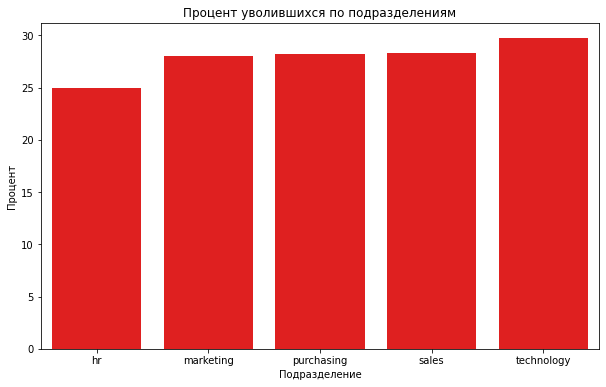

In [60]:
# рассмотрим из каких отделов чаще всего увольняются сотрудники
quit_by_dept = (df_train_quit.groupby('dept')['quit'].value_counts(normalize=True) * 100).loc[:, 'yes']

# визуализируем данные
plt.figure(figsize=(10, 6))
sns.barplot(x=quit_by_dept.index, y=quit_by_dept.values, color='red')
plt.title('Процент уволившихся по подразделениям')
plt.xlabel('Подразделение')
plt.ylabel('Процент')
plt.show()

- В процентном соотношение большее число увольнений приходится на отдел технологий.
- Почти в равном соотношении по количеству уволившихся сотрудников представлены отделы продаж, закупок и маркетинга.

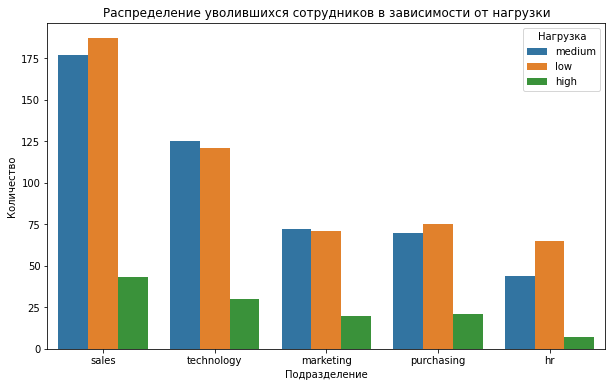

In [61]:
# рассмотрим уровень загруженности уволившегося сотрудника
plt.figure(figsize=(10, 6))
sns.countplot(x='dept', hue='workload', data=df_train_quit[df_train_quit['quit'] == 'yes'])
plt.title('Распределение уволившихся сотрудников в зависимости от нагрузки')
plt.xlabel('Подразделение')
plt.ylabel('Количество')
plt.legend(title='Нагрузка')
plt.show()

- Согласно графику, большее число увольнений приходится на сотрудников с низким уровнем нагрузки.
- Однако, отмеченное выше наблюдение не относится к отделам технологий и маркетинга — здесь увольнения чаще происходят у сотрудников со средним уровнем рабочей нагрузки.

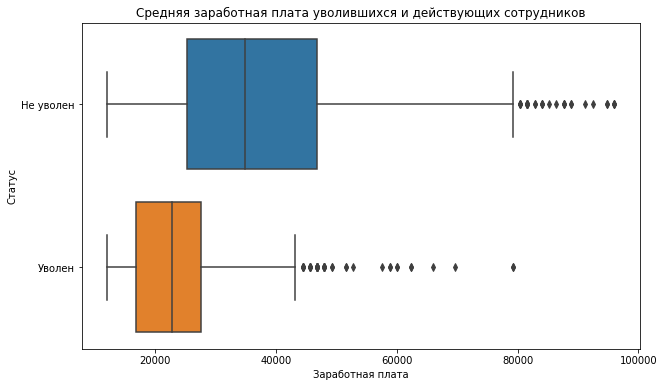

In [62]:
# сравним среднее значение зарплаты ушедших сотрудников с теми, кто остался в компании
plt.figure(figsize=(10, 6))
sns.boxplot(x='salary', y='quit', data=df_train_quit, orient='h')
plt.title('Средняя заработная плата уволившихся и действующих сотрудников')
plt.xlabel('Заработная плата')
plt.ylabel('Статус')
plt.yticks([0, 1], ['Не уволен', 'Уволен'])
plt.show()

- График показывает, что средняя заработная плата уволившихся сотрудников (около 22000) существенно ниже действующих работников компании (около 37000).
- В общем плане, потенциально уволившийся сотрудник вероятнее работет в отделе продаж с низкой рабочей нагрузкой или в отделе технологий со средним уровнем нагрузки, его средняя заработная плата ниже по сравнению с другими.

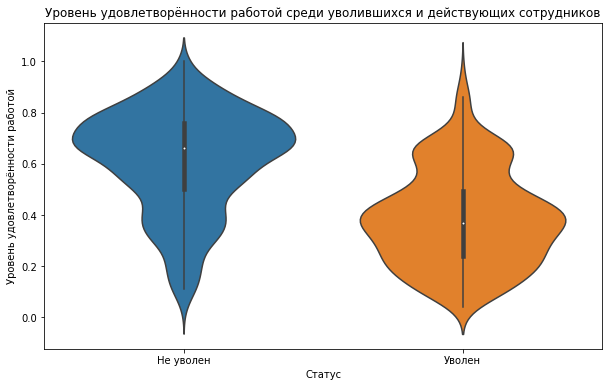

In [63]:
# объединим данные для оценки влияния уровня удовлетворённости сотрудника на факт увольнения
df_quit_sat_rate = df_test.merge(df_target, on='id', how='inner')
df_quit_sat_rate = df_quit_sat_rate.merge(df_target_quit, on='id', how='inner')

# визуализируем и сравним job_satisfaction_rate для ушедших и действующих сотрудников
plt.figure(figsize=(10, 6))
sns.violinplot(x='quit', y='job_satisfaction_rate', data=df_quit_sat_rate)
plt.title('Уровень удовлетворённости работой среди уволившихся и действующих сотрудников')
plt.xlabel('Статус')
plt.ylabel('Уровень удовлетворённости работой')
plt.xticks([0, 1], ['Не уволен', 'Уволен'])
plt.show()

- Уровень удовлетворённости работой среди уволившихся сотрудников значительно ниже, чем у действующих. Более широкие части графика указывают на более высокую плотность данных, что даёт представление о концентрации показателей удовлетворенности работой.
- Медианные значения уровня удовлетворённости работой для уволившихся сотрудников составляют около 0.4, а для дейстующих этот показатель примерно равен 0.7.
- По-видимому, уровень удовлетворённости сотрудника работой в компании может влиять на то, уволится ли сотрудник.

### Шаг 8. Добавление нового входного признака

**1. Добавим `job_satisfaction_rate`, предсказанный лучшей моделью первой задачи, к входным признакам второй задачи.**

**2. Проведём корреляционный анализ данных после добавления нового признака.**

In [64]:
# убедимся, что порядок данных в df_test и df_target_quit соответствует
df_test_reset = df_test.reset_index(drop=True)
df_target_quit_reset = df_target_quit.reset_index(drop=True)

# проверим соответствие по id
check_ord = (df_test_reset['id'] == df_target_quit_reset['id']).all()
if check_ord:
    print("Порядок данных совпадает")
else:
    print("Порядок данных не совпадает")

Порядок данных не совпадает


In [65]:
# упорядочим данные тестовой и целевой выборки по id
df_test = df_test.sort_values(by='id').reset_index(drop=True)
df_target_quit = df_target_quit.sort_values(by='id').reset_index(drop=True)

In [66]:
# добавление нового признака для тренировочных данных второй модели
train_pred_q = df_train_quit.drop(['id', 'quit'], axis=1)
train_pred_sat = randomized_search.predict(train_pred_q)
df_train_quit['job_satisfaction_rate_pred'] = train_pred_sat
df_train_quit.shape

(4000, 11)

In [67]:
# добавление нового признака для тестовых данных второй модели
test_pred_sat = randomized_search.predict(X_test)
df_test['job_satisfaction_rate_pred'] = test_pred_sat
df_test.shape

(2000, 10)

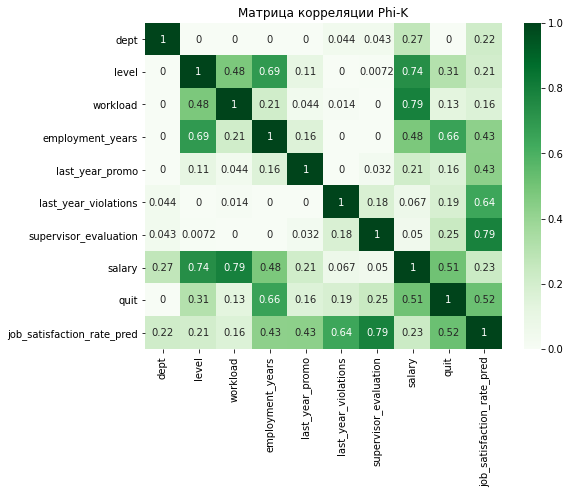

In [68]:
# для расчёта матрицы сохраним признаки в отдельную переменную, исключив id
df_train_q_phik = df_train_quit[[
    'dept',
    'level',
    'workload',
    'employment_years',
    'last_year_promo',
    'last_year_violations',
    'supervisor_evaluation',
    'salary',
    'quit',
    'job_satisfaction_rate_pred'
]]

# укажем количественные признаки
num_cols_quit = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate_pred']

# рассчитаем матрицу корреляции Phi-K между всеми признаками
phik_matrix_quit = df_train_q_phik.phik_matrix(interval_cols=num_cols_quit)

# построим heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(phik_matrix_quit, annot=True, cmap='Greens', vmin=0, vmax=1)
plt.title('Матрица корреляции Phi-K')
plt.show()

- Согласно матрице корреляций, новый признак показывает умеренную связь с целевой переменной и более тесную с оценкой качества работы сотрудника, которую дал руководитель.
- Оставим `предсказанный уровень удовлетворённости сотрудника` в качестве признака для обучения модели классификации.

### Шаг 9. Подготовка данных и обучение моделей (задача классификации)

**1. Подготовку признаков выполним в пайплайне.**
Перечислим особенности данных:
- Целевой признак — увольнение сотрудника из компании `quit`: «Yes» или «No». Закодируем строковые классы числами с помощью кодировщика `LabelEncoder` — так вычисления будут выполнятся быстрее.
- Катагориальные признаки: `dept`, `last_year_promo` и `last_year_violations` — нужно кодировать с помощью `OneHotEncoder`.
- Категориальные признаки: `level` и `workload` — нужно кодировать с помощью `OrdinalEncoder`, так как это категориальный порядковый тип. У такого признака есть логичная связь между категориями, в частности, уровень занимаемой должности и уровень загруженности сотрудника.
- Количественные признаки: `salary`, `employment_years`, `supervisor_evaluation`, `job_satisfaction_rate_pred` — нужно масштабировать.
- Масштабируем числовые признаки `RobustScaler`, чтобы сделать модель менее чувствительной к выбросам.
- Метод масштабирования сделаем гиперпараметром, то есть зададим возможность перебора методов `StandardScaler` и `MinMaxScaler`.

**2. Обучим три модели:**
- KNeighborsClassifier()
- DecisionTreeClassifier()
- LogisticRegression()

Для каждой модели подберём гиперпараметры. Для оценки качества используем метрику `ROC-AUC`, так как она подходит для бинарной классификации с несбалансированной выборкой как в нашем случае.

**3. Определим лучшую модель.**

In [69]:
# объявляем константы
RANDOM_STATE = 42

# экземпляр класса LabelEncoder для кодирования целевого признака
label_encoder = LabelEncoder()
df_train_quit['quit'] = label_encoder.fit_transform(df_train_quit['quit'])

# выделяем в отдельные переменные целевой признак и входные признаки
X_train_q = df_train_quit.drop(['id'], axis=1)

# так как мы удалили признак id с неповторяющимися значениями, то могут возникнуть дубликаты
# проверим дубликаты в X_train_q
print('Количество дубликатов в обучающей выборке:', X_train_q.duplicated().sum())

Количество дубликатов в обучающей выборке: 1413


In [70]:
# удаление дубликатов в X_train_q
X_train_q = X_train_q.drop_duplicates()
X_train_q = X_train_q.drop(['quit'], axis=1)

# приведём в соответствие целевую переменную
y_train_q = df_train_quit.loc[X_train_q.index]['quit']
X_test_q = df_test.drop(['id'], axis=1) 
y_test_q = df_target_quit['quit']

In [71]:
# списки с названиями признаков
ohe_columns_q = ['dept', 'last_year_promo', 'last_year_violations']
ord_columns_q = ['level', 'workload']
num_columns_q = ['employment_years', 'supervisor_evaluation', 'salary', 'job_satisfaction_rate_pred']

# пайплайн для подготовки признаков из списка ohe_columns: заполнение пропусков и OHE-кодирование
# SimpleImputer + OHE
ohe_pipe_q = Pipeline([
    ('missing_nan_imputer', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('missing_space_imputer', SimpleImputer(missing_values=' ', strategy='constant', fill_value='unknown')),
    ('ohe', OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False))
])

# масштабируем числовые признаки RobustScaler, чтобы сделать модель менее чувствительной к выбросам
num_transformer_q = Pipeline([
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('scaler', RobustScaler())
])

# пайплайн для подготовки признаков из списка ord_columns: заполнение пропусков и Ordinal-кодирование
# SimpleImputer + OE
ord_pipe_q = Pipeline([
    ('simpleImputer_before_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent')),
    ('ord', OrdinalEncoder(
        categories=[
            ['junior', 'middle', 'sinior'],
            ['low', 'medium', 'high']
        ],
        handle_unknown='use_encoded_value',
        unknown_value=np.nan
    )),
    ('simpleImputer_after_ord', SimpleImputer(missing_values=np.nan, strategy='most_frequent'))
])

# общий пайплайн для подготовки данных
data_preprocessor_q = ColumnTransformer([
    ('ohe', ohe_pipe_q, ohe_columns_q),
    ('ord', ord_pipe_q, ord_columns_q),
    ('num', num_transformer_q, num_columns_q)
], remainder='passthrough')

# итоговый пайплайн: подготовка данных и модель
# опускаем предупреждения
warnings.filterwarnings('ignore')

pipe_final_q = Pipeline([
    ('preprocessor', data_preprocessor_q),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

param_grid_q = [
    # словарь для модели DecisionTreeClassifier()
    {
    'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
    'models__max_depth': [None, *range(2, 11)],
    'models__min_samples_split': range(2, 11),
    'models__min_samples_leaf': range(1, 11),
    'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели KNeighborsClassifier()
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE,
            solver='liblinear',
            penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

randomized_search_q = RandomizedSearchCV(
    pipe_final_q,
    param_distributions=param_grid_q,
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

# обучаем модель
randomized_search_q.fit(X_train_q, y_train_q)

# выведем результаты оценки 10 лучших моделей
result_q = pd.DataFrame(randomized_search_q.cv_results_)
with pd.option_context('max_colwidth', 3000):
    display(result_q[['rank_test_score', 'param_models', 'mean_test_score','params']]
            .sort_values('rank_test_score').head(10))

,rank_test_score,param_models,mean_test_score,params
0,1,DecisionTreeClassifier(random_state=42),0.901932,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 9, 'models__min_samples_leaf': 2, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}"
7,2,DecisionTreeClassifier(random_state=42),0.900958,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 9, 'models__min_samples_leaf': 6, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
2,3,DecisionTreeClassifier(random_state=42),0.900084,"{'preprocessor__num': 'passthrough', 'models__min_samples_split': 9, 'models__min_samples_leaf': 2, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
3,4,DecisionTreeClassifier(random_state=42),0.899952,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 7, 'models__min_samples_leaf': 1, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
1,5,DecisionTreeClassifier(random_state=42),0.898577,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 10, 'models__min_samples_leaf': 8, 'models__max_depth': 5, 'models': DecisionTreeClassifier(random_state=42)}"
9,6,DecisionTreeClassifier(random_state=42),0.898224,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 10, 'models__min_samples_leaf': 5, 'models__max_depth': 6, 'models': DecisionTreeClassifier(random_state=42)}"
4,7,DecisionTreeClassifier(random_state=42),0.881990,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 8, 'models__min_samples_leaf': 1, 'models__max_depth': 7, 'models': DecisionTreeClassifier(random_state=42)}"
6,8,DecisionTreeClassifier(random_state=42),0.874830,"{'preprocessor__num': MinMaxScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 8, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
8,8,DecisionTreeClassifier(random_state=42),0.874830,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 4, 'models__min_samples_leaf': 3, 'models__max_depth': 2, 'models': DecisionTreeClassifier(random_state=42)}"
5,10,DecisionTreeClassifier(random_state=42),0.863544,"{'preprocessor__num': StandardScaler(), 'models__min_samples_split': 5, 'models__min_samples_leaf': 1, 'models__max_depth': 9, 'models': DecisionTreeClassifier(random_state=42)}"


In [72]:
# оценим работу модели на тестовой выборке и рассчитаем прогноз
y_test_q_prob = randomized_search_q.best_estimator_.predict_proba(X_test_q)[:, 1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test_q, y_test_q_prob)}')

Метрика ROC-AUC на тестовой выборке: 0.9125260524704163


**Вывод:**
- Лучше всего справилась модель `DecisionTreeClassifier()` с гиперпараметрами `min_samples_split=9`, `models__min_samples_leaf=2`, `max_depth=4` и `random_state=42'`.
- Значение метрики лучшей модели на тренировочной выборке *(0.9019)* указывает на хорошую способность модели различать положительные и отрицательные случаи.
- Модель показывает довольно высокие прогнозные свойства на тестовых данных. Оценка вероятности для положительного класса составляет *0.9125*. 

In [73]:
# оценим вклад каждого признака в прогнозы модели 
best_estimator_q = randomized_search_q.best_estimator_
feature_importances_q = best_estimator_q.named_steps['models'].feature_importances_

# выведем список
print('Важность признаков:')
for feature, importance in zip(X_train_q.columns, feature_importances_q):
    print(f'{feature}: {importance}')

Важность признаков:
dept: 0.0
level: 0.0
workload: 0.0020934311074175616
employment_years: 0.0
last_year_promo: 0.0
last_year_violations: 0.0
supervisor_evaluation: 0.5269853826160831
salary: 0.06408022954458359
job_satisfaction_rate_pred: 0.07347968324480515


- `supervisor_evaluation` имеет наибольшую значимость (0.52), что позволяет предположить, что это решающий фактор в прогнозировании оттока 
- `job_satisfaction_rate_pred` (0.07) и `salary` (0.06) также имеет относительно хорошую значимость
- остальные признаки не повлияли или почти не повлияли на прогнозы модели, то есть в данном случае они бесполезны для прогноза

### Шаг 10. Выводы по второй модели (задача классификации)

- В рамках второй задачи предстояло построить модель для прогноза оттока сотрудников — задача для бинарной классификации. В этой связи мы рассмотрели возможности `KNeighborsClassifier()`, `DecisionTreeClassifier()` и `LogisticRegression()`.
- На этапе исследовательского анализа данных было обнаружено, что категориальных признаков гораздо больше, чем количественных. С такими данными линейные модели или kNN справляются не очень хорошо.
- Из трёх моделей лучше справилась модель `DecisionTreeClassifier()`, для которой путем эксперимента были подобраны гиперпараметры. 
- Чтобы улучшить качество модели, мы экспериментировали с такими гиперпараметрами как: `max_depth`, `min_samples_split`, `min_samples_leaf` — они больше всего влияют на построение дерева решений. 

### Шаг 11. Общий вывод

На данных компании был проведён исследовательский анализ с последующей разработкой решения на основе моделирования, которое поможет бизнесу оптимизировать управление персоналом.

Учитывая бизнес-задачи заказчика:
1. Спроектированы и протестированы пять моделей на основе разных алгоритмов. 
2. Для моделей были подобраны гиперпараметры.
3. На основе результатов метрик для оценки обобщающих способностей модели, были отобраны две лучшие модели:

- Первая модель предсказывает уровень удовлетворённости сотрудников работой в компании.
- Вторая — предсказывает вероятность оттока сотрудников.

Работа включала предварительный этап, исследовательский анализ данных, разработку моделей, оценку важности признаков для лучшей модели, и составление портрета «уволившегося сотрудника» с учётом результатов моделирования.

На **предварительном этапе** мы изучили основные сведения о пяти датасетах с последующей предобработкой, в частности: определили количество и тип данных в таблицах, проверили данные на наличие дубликатов и пропущенных значений по каждому столбцу, преобразовали тип значений в некоторых столбцах и убедились, что все данные отображаются корректно.

На этапе **исследовательского анализа** был проведён статистический анализ всех признаков, построены графики и оценены особенности распределения количественных признаков.

Этап **разработки модели** включал подготовку данных для её обучения, отбор соответствующих признаков, их масштабирование и кодирование, настройку гиперпараметров, обучение модели, оценку качества с использованием метрик и получение прогнозных значений.

Этап **оценки важности признаков** для лучшей модели предполагал изучение признаков, которые вносят наибольший вклад в корректное предсказание модели.

Этап **составление портрета «уволившегося сотрудника»** включал графическое и аналитическое исследование ушедших и действующих сотрудников с использованием результатов моделирования.

**Основные результаты:**
- В рамках первой задачи предстояло построить модель для прогноза **уровня удовлетворённости сотрудников** — задача линейной регрессии. В этой связи мы рассмотрели возможности линейной регрессии и регрессора дерева решений.
- На этапе исследовательского анализа данных, было обнаружено отсутствие линейной связи между входными признаками и целевой переменной.
- **Линейная регрессия**: предполагает линейную связь между признаками и целевой переменной и может плохо отражать нелинейные закономерности, если не используются дополнительные функции проектирования или полиномиальные функции.
- **Регрессор дерева решений**: может фиксировать сложные взаимосвязи в данных, включая нелинейные закономерности. Он создает древовидную структуру, в которой каждый внутренний узел представляет решение, основанное на признаке, а каждый листовой узел представляет прогнозируемое значение.
- Указанные особенности подтвердились в эксперименте — из двух моделей лучше справилась модель `DecisionTreeRegressor()` с гиперпараметрами `max_depth=15`, `min_samples_leaf=5`, `min_samples_split=10`, `random_state=42`.
- В числе важных признаков для прогноза **удовлетворённости сотрудника работой в компании** — `нарушал ли сотрудник трудовой договор за последний год` и `оценка качества работы сотрудника руководителем`.
- Дополнительный анализ данных для **составления портрета «уволившегося сотрудника»** в общем плане показал, что потенциально уволившийся сотрудник вероятнее работет в отделе продаж с низкой рабочей нагрузкой или в отделе технологий со средним уровнем нагрузки, его средняя заработная плата ниже по сравнению с другими. Кроме того, уровень удовлетворённости сотрудника работой в компании может влиять на то, уволится ли он.
- В рамках второй задачи предстояло построить модель для прогноза **оттока сотрудников** — задача для бинарной классификации. В этой связи мы рассмотрели возможности `KNeighborsClassifier()`, `DecisionTreeClassifier()` и `LogisticRegression()`.
- На этапе исследовательского анализа данных было обнаружено, что категориальных признаков гораздо больше, чем количественных. С такими данными линейные модели или kNN справляются не очень хорошо.
- Из трёх моделей лучше справилась модель `DecisionTreeClassifier()`, для которой путем эксперимента были подобраны гиперпараметры. 
- Чтобы улучшить качество модели, мы экспериментировали с такими гиперпараметрами как: `max_depth`, `min_samples_split`, `min_samples_leaf` — они больше всего влияют на построение дерева решений. 

**Какие условия работы в компании больше всего влияют на то, уволится сотрудник или нет?**

- Оценка качества работы сотрудника, которую дал руководитель — один из самых важных признаков, это решающий фактор в прогнозировании оттока кадров и удовлетворённости сотрудника работой в компании. Предсказанный уровень удовлетворённости сотрудника работой в компании и заработная плата также имеют относительно высокую значимость.
- На отток сотрудников и их удовлетворённость работой в компании не влияет то, в каком отделе он работает, уровень занимаемой должности и уровень загруженности сотрудника. Эти признаки практически не повлияли на прогнозы моделей.